In [6]:
#3) HOW WILL MY PROGRESS AND/OR PERFORMANCE BE MEASURED?
#What reading do you do on the side to improve your work?

#1678 different breeds, 411 unique colors

import pandas as pd

test = pd.read_csv('/home/ubuntu/shelter_test.csv')
train = pd.read_csv('/home/ubuntu/shelter_train.csv')

savefig_ = False

In [7]:
train.head(1)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White


# Initial Exploration

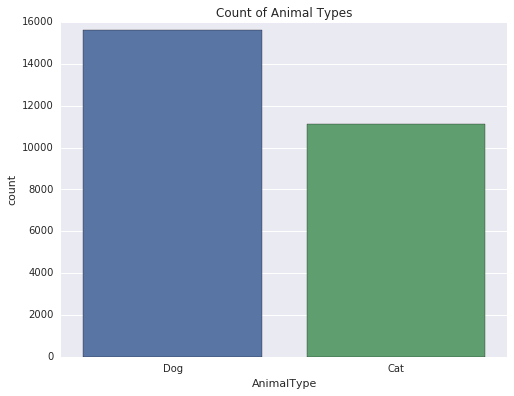

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(8, 6))
sns.countplot(train.AnimalType)
plt.title('Count of Animal Types')


if savefig_:
    plt.savefig('/home/ubuntu/animal_type_count.png', bbox_inches = 'tight')

   Adoption  Died  Euthanasia  ReturnToOwner  Transfer Named
0      6497    50         845           4286      3917   Dog
1      4272   147         710            500      5505   Cat


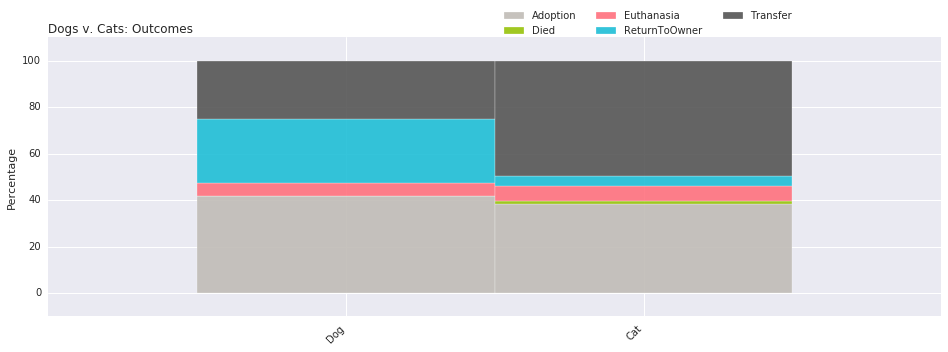

In [9]:
dog_df = train[train['AnimalType'] == 'Dog']
cat_df = train[train['AnimalType'] == 'Cat']

name_out = np.empty((0,5), int)

name_out = np.vstack((name_out, np.array(dog_df.groupby('OutcomeType').size().values.T)))
name_out = np.vstack((name_out, np.array(cat_df.groupby('OutcomeType').size().values.T)))

df = pd.DataFrame(name_out, columns = ['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'])
df['Named'] = ['Dog', 'Cat']
print(df)

# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(20,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['Adoption']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k+l+m for i,j,k,l,m in zip(df['Adoption'], df['Died'], df['Euthanasia'], df['ReturnToOwner'], df['Transfer'])]

# Create the percentage of the total score the pre_score value for each participant was
ad_rel = [i / j * 100 for  i,j in zip(df['Adoption'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
di_rel = [i / j * 100 for  i,j in zip(df['Died'], totals)]

# Create the percentage of the total score the post_score value for each participant was
eu_rel = [i / j * 100 for  i,j in zip(df['Euthanasia'], totals)]
re_rel = [i / j * 100 for  i,j in zip(df['ReturnToOwner'], totals)]
tr_rel = [i / j * 100 for  i,j in zip(df['Transfer'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       ad_rel, 
       # labeled 
       label='Adoptions', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#C0BCB6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       di_rel, 
       # with pre_rel
       bottom=ad_rel, 
       # labeled 
       label='Died', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#97C30A', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       eu_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(ad_rel, di_rel)], 
       # labeled 
       label='Euthanised',
       # with alpha
       alpha=0.9, 
       # with color
       color='#FF717E', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       re_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k for i,j,k in zip(ad_rel, di_rel, eu_rel)], 
       # labeled 
       label='Returned To Owner',
       # with alpha
       alpha=0.9, 
       # with color 
       color = '#1FBED6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       tr_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k+l for i,j,k,l in zip(ad_rel, di_rel, eu_rel, re_rel)], 
       # labeled 
       label='Transferred',
       # with alpha
       alpha=0.9,
       color = '#555555',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, df['Named'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'],loc='center left', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.title('Dogs v. Cats: Outcomes',loc = 'left')

if savefig_:    
    plt.savefig('/home/ubuntu/dogs_v_cats_outcomes.jpg', bbox_inches = 'tight')
plt.show()

##

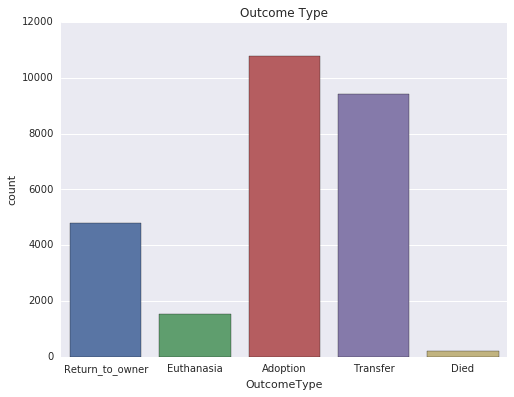

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(train.OutcomeType)

plt.title('Outcome Type')

if savefig_:
    plt.savefig('/home/ubuntu/outcome_type_count.png', bbox_inches = 'tight')

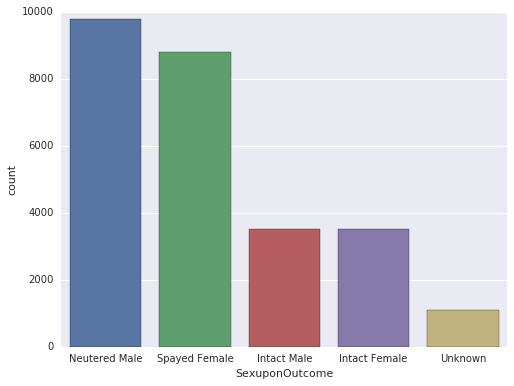

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(train.SexuponOutcome)

if savefig_:
    plt.savefig('/home/ubuntu/sexuponoutcome.png', bbox_inches = 'tight')

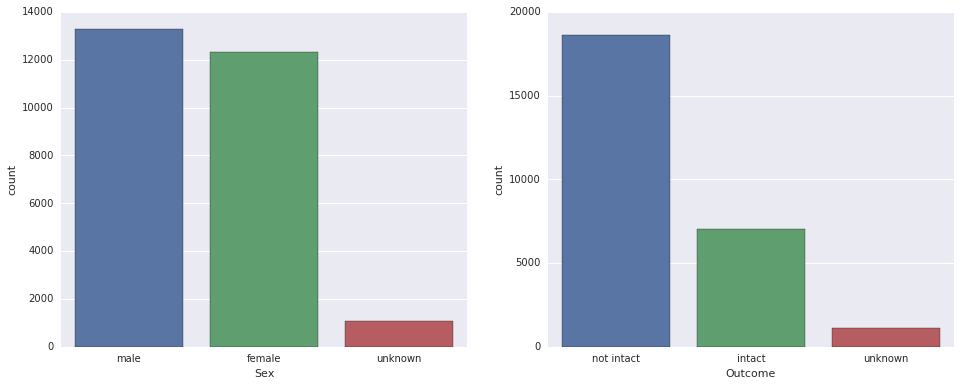

In [12]:
def get_sex(x):
    x = str(x).split()
    if('Male' in x): return 'male'
    if('Female' in x): return 'female'
    return 'unknown'

def get_outcome(x):
    x =  str(x).split()
    if('Spayed' in x): return 'not intact'
    if('Neutered' in x): return 'not intact'
    if('Intact' in x): return 'intact'
    return 'unknown'

train['Sex'] = train['SexuponOutcome'].apply(lambda x: get_sex(x))
train['Outcome'] = train['SexuponOutcome'].apply(lambda x: get_outcome(x))

test['Sex'] = test['SexuponOutcome'].apply(lambda x: get_sex(x))
test['Outcome'] = test['SexuponOutcome'].apply(lambda x: get_outcome(x))

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))
sns.countplot(train.Sex, ax=ax1)
sns.countplot(train.Outcome, ax = ax2)

  AnimalID     Name             DateTime      OutcomeType OutcomeSubtype  \
0  A671945  Hambone  2014-02-12 18:22:00  Return_to_owner            NaN   
2  A686464   Pearce  2015-01-31 12:28:00         Adoption         Foster   
4  A667013      NaN  2013-11-15 12:52:00         Transfer        Partner   
5  A677334     Elsa  2014-04-25 13:04:00         Transfer        Partner   
8  A671784     Lucy  2014-02-04 17:17:00         Adoption            NaN   

  AnimalType SexuponOutcome AgeuponOutcome                              Breed  \
0        Dog  Neutered Male         1 year              Shetland Sheepdog Mix   
2        Dog  Neutered Male        2 years                       Pit Bull Mix   
4        Dog  Neutered Male        2 years        Lhasa Apso/Miniature Poodle   
5        Dog  Intact Female        1 month  Cairn Terrier/Chihuahua Shorthair   
8        Dog  Spayed Female       5 months      American Pit Bull Terrier Mix   

         Color     Sex     Outcome        Mix  
0  Brown

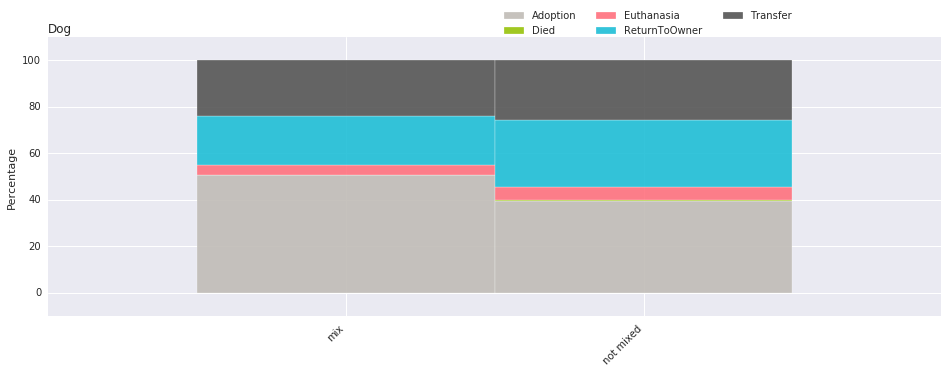

In [13]:
def get_mix(x):
    if('mix' in x.split()):
        return 'mix'
    if('/' in x):
        return 'mix'
    return 'not mixed'
    

train['Mix'] = train['Breed'].apply(get_mix)
test['Mix'] = test['Breed'].apply(get_mix)
dog_df = train[train['AnimalType'] == 'Dog']
cat_df = train[train['AnimalType'] == 'Cat']

name_out = np.empty((0,5), int)
print(dog_df.head(5))
name_out = np.vstack((name_out, np.array(dog_df[dog_df['Mix'] == 'mix'].groupby('OutcomeType').size().values.T)))
name_out = np.vstack((name_out, np.array(dog_df[dog_df['Mix'] == 'not mixed'].groupby('OutcomeType').size().values.T)))

df = pd.DataFrame(name_out, columns = ['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'])
df['Named'] = ['mix', 'not mixed']
print(df)

# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(20,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['Adoption']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k+l+m for i,j,k,l,m in zip(df['Adoption'], df['Died'], df['Euthanasia'], df['ReturnToOwner'], df['Transfer'])]

# Create the percentage of the total score the pre_score value for each participant was
ad_rel = [i / j * 100 for  i,j in zip(df['Adoption'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
di_rel = [i / j * 100 for  i,j in zip(df['Died'], totals)]

# Create the percentage of the total score the post_score value for each participant was
eu_rel = [i / j * 100 for  i,j in zip(df['Euthanasia'], totals)]
re_rel = [i / j * 100 for  i,j in zip(df['ReturnToOwner'], totals)]
tr_rel = [i / j * 100 for  i,j in zip(df['Transfer'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       ad_rel, 
       # labeled 
       label='Adoptions', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#C0BCB6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       di_rel, 
       # with pre_rel
       bottom=ad_rel, 
       # labeled 
       label='Died', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#97C30A', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       eu_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(ad_rel, di_rel)], 
       # labeled 
       label='Euthanised',
       # with alpha
       alpha=0.9, 
       # with color
       color='#FF717E', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       re_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k for i,j,k in zip(ad_rel, di_rel, eu_rel)], 
       # labeled 
       label='Returned To Owner',
       # with alpha
       alpha=0.9, 
       # with color 
       color = '#1FBED6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       tr_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k+l for i,j,k,l in zip(ad_rel, di_rel, eu_rel, re_rel)], 
       # labeled 
       label='Transferred',
       # with alpha
       alpha=0.9,
       color = '#555555',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, df['Named'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'],loc='center left', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.title('Dog',loc = 'left')

if savefig_:
    plt.savefig('/home/ubuntu/dog_percent_mix_not.png', bbox_inches = 'tight')
plt.show()
##

   Adoption  Died  Euthanasia  ReturnToOwner  Transfer      Named
0        12     1           1              1        13        mix
1      4260   146         709            499      5492  not mixed


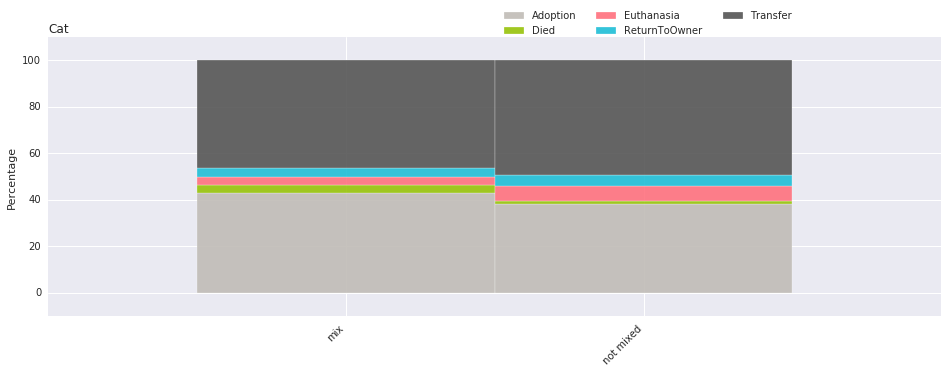

In [14]:
dog_df = train[train['AnimalType'] == 'Dog']
cat_df = train[train['AnimalType'] == 'Cat']

name_out = np.empty((0,5), int)

name_out = np.vstack((name_out, np.array(cat_df[cat_df['Mix'] == 'mix'].groupby('OutcomeType').size().values.T)))
name_out = np.vstack((name_out, np.array(cat_df[cat_df['Mix'] == 'not mixed'].groupby('OutcomeType').size().values.T)))

df = pd.DataFrame(name_out, columns = ['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'])
df['Named'] = ['mix', 'not mixed']
print(df)

# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(20,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['Adoption']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k+l+m for i,j,k,l,m in zip(df['Adoption'], df['Died'], df['Euthanasia'], df['ReturnToOwner'], df['Transfer'])]

# Create the percentage of the total score the pre_score value for each participant was
ad_rel = [i / j * 100 for  i,j in zip(df['Adoption'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
di_rel = [i / j * 100 for  i,j in zip(df['Died'], totals)]

# Create the percentage of the total score the post_score value for each participant was
eu_rel = [i / j * 100 for  i,j in zip(df['Euthanasia'], totals)]
re_rel = [i / j * 100 for  i,j in zip(df['ReturnToOwner'], totals)]
tr_rel = [i / j * 100 for  i,j in zip(df['Transfer'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       ad_rel, 
       # labeled 
       label='Adoptions', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#C0BCB6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       di_rel, 
       # with pre_rel
       bottom=ad_rel, 
       # labeled 
       label='Died', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#97C30A', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       eu_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(ad_rel, di_rel)], 
       # labeled 
       label='Euthanised',
       # with alpha
       alpha=0.9, 
       # with color
       color='#FF717E', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       re_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k for i,j,k in zip(ad_rel, di_rel, eu_rel)], 
       # labeled 
       label='Returned To Owner',
       # with alpha
       alpha=0.9, 
       # with color 
       color = '#1FBED6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       tr_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k+l for i,j,k,l in zip(ad_rel, di_rel, eu_rel, re_rel)], 
       # labeled 
       label='Transferred',
       # with alpha
       alpha=0.9,
       color = '#555555',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, df['Named'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'],loc='center left', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.title('Cat',loc = 'left')

if savefig_:
    plt.savefig('/home/ubuntu/cat_percent_mix_not.png', bbox_inches = 'tight')
plt.show()
##

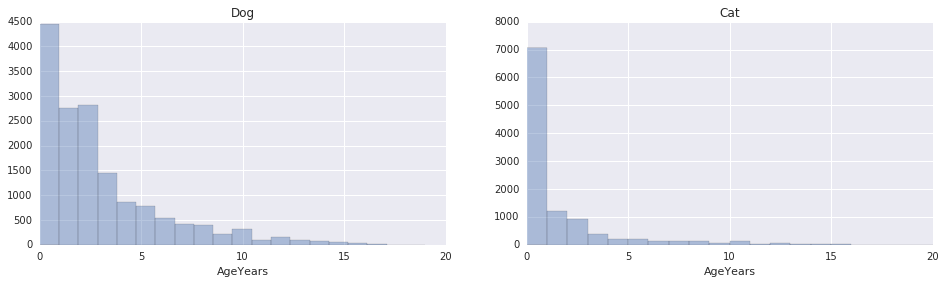

In [15]:
def time_to_years(date):
    try:
        d_split = date.split(' ')
        if(d_split[1] in ['months', 'month']):
            return float(d_split[0])/12
        if(d_split[1] in ['year', 'years']):
            return float(d_split[0])
        if(d_split[1] in ['week', 'weeks']):
            return float(d_split[0])/52
    except AttributeError:
        return 0
train['AgeYears'] = train['AgeuponOutcome'].apply(lambda x: time_to_years(x))
test['AgeYears'] = test['AgeuponOutcome'].apply(lambda x: time_to_years(x))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.distplot(train[train['AnimalType'] == 'Dog'].AgeYears.dropna(), 
                                                                bins = 20, kde = False, ax = ax1)

ax1.set_title('Dog')
sns.distplot(train[train['AnimalType'] == 'Cat'].AgeYears.dropna(), bins = 20, kde = False, ax = ax2)

ax2.set_title('Cat')

if savefig_:
    plt.savefig('/home/ubuntu/age_distribution.png', bbox_inches = 'tight')

   Adoption  Died  Euthanasia  ReturnToOwner  Transfer    Named
0      4941    30         378           1912      2757    Child
1       765     4         164            886       482     Teen
2       674     4         180           1036       454    Adult
3       117    12         123            452       224  Elderly


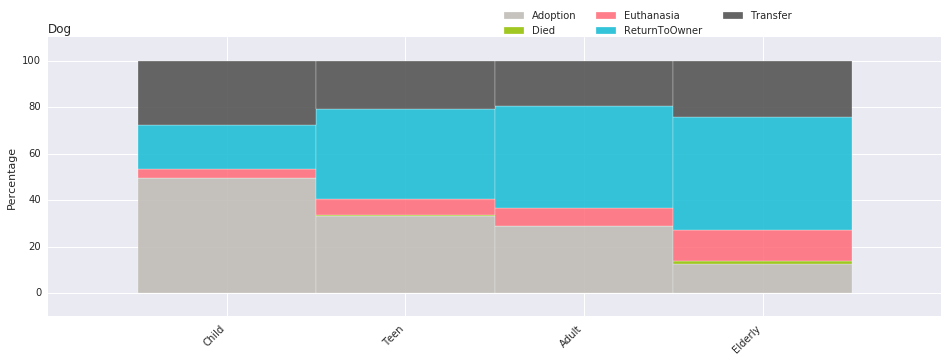

In [16]:
def age_categories(x):
    if(x < 3): return 'child'
    if(x < 5): return 'teen'
    if(x < 10): return 'adult'
    return 'elderly'

train['AgeCategories'] = train['AgeYears'].apply(lambda x: age_categories(x))
test['AgeCategories'] = test['AgeYears'].apply(lambda x: age_categories(x))
'''
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data = train, x = 'AgeCategories', hue = 'OutcomeType', ax = ax1)
sns.countplot(data = train, x = 'OutcomeType', hue = 'AgeCategories', ax = ax2)
'''
dog_df = train[train['AnimalType'] == 'Dog']
cat_df = train[train['AnimalType'] == 'Cat']

name_out = np.empty((0,5), int)

name_out = np.vstack((name_out, np.array(dog_df[dog_df['AgeCategories'] == 'child'].groupby('OutcomeType').size().values.T)))
name_out = np.vstack((name_out, np.array(dog_df[dog_df['AgeCategories'] == 'teen'].groupby('OutcomeType').size().values.T)))
name_out = np.vstack((name_out, np.array(dog_df[dog_df['AgeCategories'] == 'adult'].groupby('OutcomeType').size().values.T)))
name_out = np.vstack((name_out, np.array(dog_df[dog_df['AgeCategories'] == 'elderly'].groupby('OutcomeType').size().values.T)))

df = pd.DataFrame(name_out, columns = ['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'])
df['Named'] = ['Child', 'Teen', 'Adult', 'Elderly']
print(df)

# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(20,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['Adoption']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k+l+m for i,j,k,l,m in zip(df['Adoption'], df['Died'], df['Euthanasia'], df['ReturnToOwner'], df['Transfer'])]

# Create the percentage of the total score the pre_score value for each participant was
ad_rel = [i / j * 100 for  i,j in zip(df['Adoption'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
di_rel = [i / j * 100 for  i,j in zip(df['Died'], totals)]

# Create the percentage of the total score the post_score value for each participant was
eu_rel = [i / j * 100 for  i,j in zip(df['Euthanasia'], totals)]
re_rel = [i / j * 100 for  i,j in zip(df['ReturnToOwner'], totals)]
tr_rel = [i / j * 100 for  i,j in zip(df['Transfer'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       ad_rel, 
       # labeled 
       label='Adoptions', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#C0BCB6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       di_rel, 
       # with pre_rel
       bottom=ad_rel, 
       # labeled 
       label='Died', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#97C30A', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       eu_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(ad_rel, di_rel)], 
       # labeled 
       label='Euthanised',
       # with alpha
       alpha=0.9, 
       # with color
       color='#FF717E', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       re_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k for i,j,k in zip(ad_rel, di_rel, eu_rel)], 
       # labeled 
       label='Returned To Owner',
       # with alpha
       alpha=0.9, 
       # with color 
       color = '#1FBED6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       tr_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k+l for i,j,k,l in zip(ad_rel, di_rel, eu_rel, re_rel)], 
       # labeled 
       label='Transferred',
       # with alpha
       alpha=0.9,
       color = '#555555',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, df['Named'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'],loc='center left', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.title('Dog',loc = 'left')

if savefig_:
    plt.savefig('/home/ubuntu/age_categories_dog.png', bbox_inches = 'tight')
plt.show()

   Adoption  Died  Euthanasia  ReturnToOwner  Transfer    Named
0      3741   117         447            244      4654    Child
1       177     4          55             93       264     Teen
2       234     4          97            101       233    Adult
3       120    22         111             62       354  Elderly


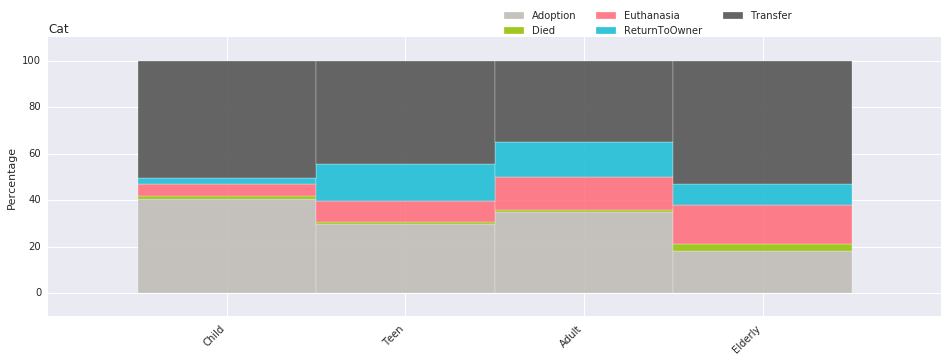

In [17]:

cat_df = train[train['AnimalType'] == 'Cat']
name_out = np.empty((0,5), int)

name_out = np.vstack((name_out, np.array(cat_df[cat_df['AgeCategories'] == 'child'].groupby('OutcomeType').size().values.T)))
name_out = np.vstack((name_out, np.array(cat_df[cat_df['AgeCategories'] == 'teen'].groupby('OutcomeType').size().values.T)))
name_out = np.vstack((name_out, np.array(cat_df[cat_df['AgeCategories'] == 'adult'].groupby('OutcomeType').size().values.T)))
name_out = np.vstack((name_out, np.array(cat_df[cat_df['AgeCategories'] == 'elderly'].groupby('OutcomeType').size().values.T)))

df = pd.DataFrame(name_out, columns = ['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'])
df['Named'] = ['Child', 'Teen', 'Adult', 'Elderly']
print(df)

# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(20,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['Adoption']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k+l+m for i,j,k,l,m in zip(df['Adoption'], df['Died'], df['Euthanasia'], df['ReturnToOwner'], df['Transfer'])]

# Create the percentage of the total score the pre_score value for each participant was
ad_rel = [i / j * 100 for  i,j in zip(df['Adoption'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
di_rel = [i / j * 100 for  i,j in zip(df['Died'], totals)]

# Create the percentage of the total score the post_score value for each participant was
eu_rel = [i / j * 100 for  i,j in zip(df['Euthanasia'], totals)]
re_rel = [i / j * 100 for  i,j in zip(df['ReturnToOwner'], totals)]
tr_rel = [i / j * 100 for  i,j in zip(df['Transfer'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       ad_rel, 
       # labeled 
       label='Adoptions', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#C0BCB6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       di_rel, 
       # with pre_rel
       bottom=ad_rel, 
       # labeled 
       label='Died', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#97C30A', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       eu_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(ad_rel, di_rel)], 
       # labeled 
       label='Euthanised',
       # with alpha
       alpha=0.9, 
       # with color
       color='#FF717E', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       re_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k for i,j,k in zip(ad_rel, di_rel, eu_rel)], 
       # labeled 
       label='Returned To Owner',
       # with alpha
       alpha=0.9, 
       # with color 
       color = '#1FBED6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       tr_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k+l for i,j,k,l in zip(ad_rel, di_rel, eu_rel, re_rel)], 
       # labeled 
       label='Transferred',
       # with alpha
       alpha=0.9,
       color = '#555555',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, df['Named'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'],loc='center left', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.title('Cat',loc = 'left')

if savefig_:
    plt.savefig('/home/ubuntu/age_categories_cat.png', bbox_inches = 'tight')
plt.show()

##

   Adoption  Died  Euthanasia  ReturnToOwner  Transfer    Named
0      5465    22         584           4177      2675    Named
1      1032    28         261            109      1242  Unnamed


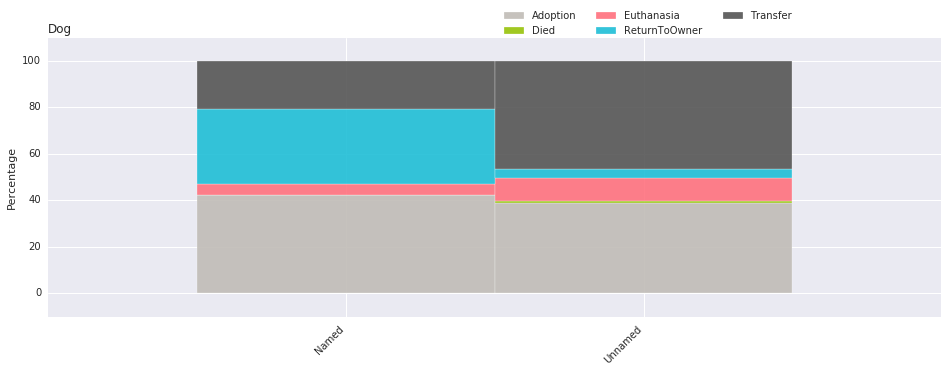

In [18]:
#Named/Unnamed outcomes for Dog/Cat

def named(x):
    x = str(x)
    if(x == 'nan'):
        return 'unnamed'
    return 'named'

train['HasName'] = train['Name'].apply(lambda x: named(x))
test['HasName'] = test['Name'].apply(lambda x: named(x))

##

dog_df = train[train['AnimalType'] == 'Dog']
cat_df = train[train['AnimalType'] == 'Cat']


name_out = np.empty((0,5), int)

name_out = np.vstack((name_out, np.array(dog_df[dog_df['HasName'] == 'named'].groupby('OutcomeType').size().values.T)))
name_out = np.vstack((name_out, np.array(dog_df[dog_df['HasName'] == 'unnamed'].groupby('OutcomeType').size().values.T)))

df = pd.DataFrame(name_out, columns = ['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'])
df['Named'] = ['Named', 'Unnamed']
print(df)

# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(20,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['Adoption']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k+l+m for i,j,k,l,m in zip(df['Adoption'], df['Died'], df['Euthanasia'], df['ReturnToOwner'], df['Transfer'])]

# Create the percentage of the total score the pre_score value for each participant was
ad_rel = [i / j * 100 for  i,j in zip(df['Adoption'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
di_rel = [i / j * 100 for  i,j in zip(df['Died'], totals)]

# Create the percentage of the total score the post_score value for each participant was
eu_rel = [i / j * 100 for  i,j in zip(df['Euthanasia'], totals)]
re_rel = [i / j * 100 for  i,j in zip(df['ReturnToOwner'], totals)]
tr_rel = [i / j * 100 for  i,j in zip(df['Transfer'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       ad_rel, 
       # labeled 
       label='Adoptions', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#C0BCB6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       di_rel, 
       # with pre_rel
       bottom=ad_rel, 
       # labeled 
       label='Died', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#97C30A', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       eu_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(ad_rel, di_rel)], 
       # labeled 
       label='Euthanised',
       # with alpha
       alpha=0.9, 
       # with color
       color='#FF717E', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       re_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k for i,j,k in zip(ad_rel, di_rel, eu_rel)], 
       # labeled 
       label='Returned To Owner',
       # with alpha
       alpha=0.9, 
       # with color 
       color = '#1FBED6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       tr_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k+l for i,j,k,l in zip(ad_rel, di_rel, eu_rel, re_rel)], 
       # labeled 
       label='Transferred',
       # with alpha
       alpha=0.9,
       color = '#555555',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, df['Named'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'],loc='center left', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.title('Dog',loc = 'left')

if savefig_:
    plt.savefig('/home/ubuntu/named_dog.png', bbox_inches = 'tight')
plt.show()


##


   Adoption  Died  Euthanasia  ReturnToOwner  Transfer    Named
0      3626    55         156            456      1822    Named
1       646    92         554             44      3683  Unnamed


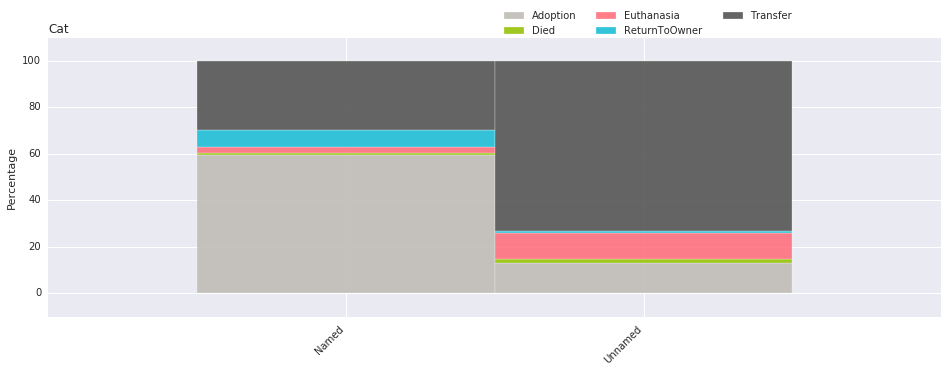

In [19]:
name_out = np.empty((0,5), int)

name_out = np.vstack((name_out, np.array(cat_df[cat_df['HasName'] == 'named'].groupby('OutcomeType').size().values.T)))
name_out = np.vstack((name_out, np.array(cat_df[cat_df['HasName'] == 'unnamed'].groupby('OutcomeType').size().values.T)))

df = pd.DataFrame(name_out, columns = ['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'])
df['Named'] = ['Named', 'Unnamed']
print(df)

# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(20,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['Adoption']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k+l+m for i,j,k,l,m in zip(df['Adoption'], df['Died'], df['Euthanasia'], df['ReturnToOwner'], df['Transfer'])]

# Create the percentage of the total score the pre_score value for each participant was
ad_rel = [i / j * 100 for  i,j in zip(df['Adoption'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
di_rel = [i / j * 100 for  i,j in zip(df['Died'], totals)]

# Create the percentage of the total score the post_score value for each participant was
eu_rel = [i / j * 100 for  i,j in zip(df['Euthanasia'], totals)]
re_rel = [i / j * 100 for  i,j in zip(df['ReturnToOwner'], totals)]
tr_rel = [i / j * 100 for  i,j in zip(df['Transfer'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       ad_rel, 
       # labeled 
       label='Adoptions', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#C0BCB6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       di_rel, 
       # with pre_rel
       bottom=ad_rel, 
       # labeled 
       label='Died', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#97C30A', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       eu_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(ad_rel, di_rel)], 
       # labeled 
       label='Euthanised',
       # with alpha
       alpha=0.9, 
       # with color
       color='#FF717E', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       re_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k for i,j,k in zip(ad_rel, di_rel, eu_rel)], 
       # labeled 
       label='Returned To Owner',
       # with alpha
       alpha=0.9, 
       # with color 
       color = '#1FBED6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       tr_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k+l for i,j,k,l in zip(ad_rel, di_rel, eu_rel, re_rel)], 
       # labeled 
       label='Transferred',
       # with alpha
       alpha=0.9,
       color = '#555555',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, df['Named'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'],loc='center left', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.title('Cat',loc = 'left')

if savefig_:
    plt.savefig('/home/ubuntu/named_cat.png', bbox_inches = 'tight')
plt.show()


##



   Adoption  Died  Euthanasia  ReturnToOwner  Transfer      Named
0       209    11         124             41        96    Morning
1      2256    23         434           2096      2460  Afternoon
2      3973    15         286           2127      1153    Evening
3        59     1           1             22       208      Night


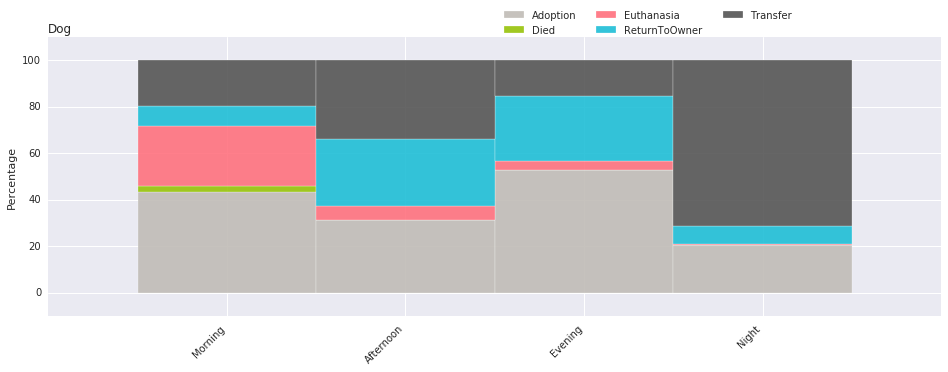

In [20]:
import datetime
from sklearn.preprocessing import LabelEncoder
#Split time into, 5 - 10AM, 11 AM - 3 PM, 4 - 7 PM, 8PM - 4 AM 

def get_timeofday(x):
    x = datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour
    if(x >= 5 and x < 11): return 'morning'
    if(x >= 11 and x < 16): return 'afternoon'
    if(x >= 16 and x < 20): return 'evening'
    return 'night'

train['TimeOfDay'] = train['DateTime'].apply(lambda x: get_timeofday(x))
test['TimeOfDay'] = test['DateTime'].apply(lambda x: get_timeofday(x))
'''
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 4))
sns.countplot(data = train[train['AnimalType'] == 'Dog'], x = 'TimeOfDay', hue = 'OutcomeType', ax = ax1)
ax1.set_title('Dog')
sns.countplot(data = train[train['AnimalType'] == 'Cat'], x = 'TimeOfDay', hue = 'OutcomeType', ax = ax2)
ax2.set_title('Cat')
'''
##

dog_df = train[train['AnimalType'] == 'Dog']
cat_df = train[train['AnimalType'] == 'Cat']


name_out = np.empty((0,5), int)

name_out = np.vstack((name_out, np.array(dog_df[dog_df['TimeOfDay'] == 'morning'].groupby('OutcomeType').size().values.T)))
name_out = np.vstack((name_out, np.array(dog_df[dog_df['TimeOfDay'] == 'afternoon'].groupby('OutcomeType').size().values.T)))
name_out = np.vstack((name_out, np.array(dog_df[dog_df['TimeOfDay'] == 'evening'].groupby('OutcomeType').size().values.T)))
name_out = np.vstack((name_out, np.array(dog_df[dog_df['TimeOfDay'] == 'night'].groupby('OutcomeType').size().values.T)))



df = pd.DataFrame(name_out, columns = ['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'])
df['Named'] = ['Morning', 'Afternoon', 'Evening', 'Night']
print(df)

# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(20,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['Adoption']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k+l+m for i,j,k,l,m in zip(df['Adoption'], df['Died'], df['Euthanasia'], df['ReturnToOwner'], df['Transfer'])]

# Create the percentage of the total score the pre_score value for each participant was
ad_rel = [i / j * 100 for  i,j in zip(df['Adoption'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
di_rel = [i / j * 100 for  i,j in zip(df['Died'], totals)]

# Create the percentage of the total score the post_score value for each participant was
eu_rel = [i / j * 100 for  i,j in zip(df['Euthanasia'], totals)]
re_rel = [i / j * 100 for  i,j in zip(df['ReturnToOwner'], totals)]
tr_rel = [i / j * 100 for  i,j in zip(df['Transfer'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       ad_rel, 
       # labeled 
       label='Adoptions', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#C0BCB6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       di_rel, 
       # with pre_rel
       bottom=ad_rel, 
       # labeled 
       label='Died', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#97C30A', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       eu_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(ad_rel, di_rel)], 
       # labeled 
       label='Euthanised',
       # with alpha
       alpha=0.9, 
       # with color
       color='#FF717E', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       re_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k for i,j,k in zip(ad_rel, di_rel, eu_rel)], 
       # labeled 
       label='Returned To Owner',
       # with alpha
       alpha=0.9, 
       # with color 
       color = '#1FBED6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       tr_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k+l for i,j,k,l in zip(ad_rel, di_rel, eu_rel, re_rel)], 
       # labeled 
       label='Transferred',
       # with alpha
       alpha=0.9,
       color = '#555555',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, df['Named'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'],loc='center left', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.title('Dog', loc = 'left')

if savefig_:
    plt.savefig('/home/ubuntu/time_adopt_dog.png', bbox_inches = 'tight')
plt.show()



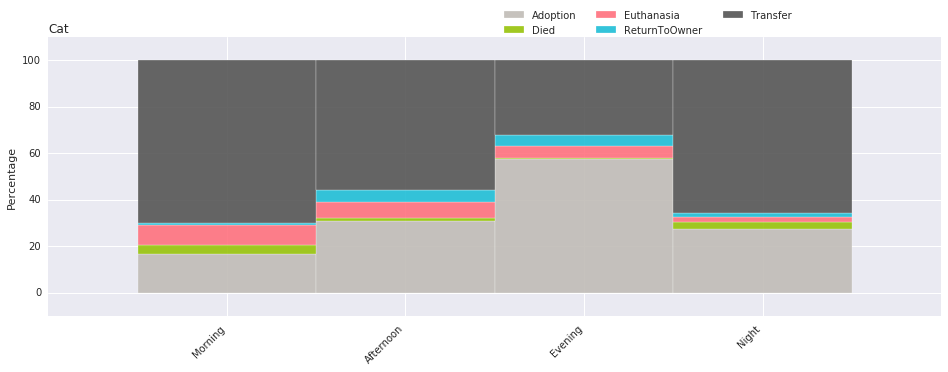

In [21]:
name_out = np.empty((0,5), int)

name_out = np.vstack((name_out, np.array(cat_df[cat_df['TimeOfDay'] == 'morning'].groupby('OutcomeType').size().values.T)))
name_out = np.vstack((name_out, np.array(cat_df[cat_df['TimeOfDay'] == 'afternoon'].groupby('OutcomeType').size().values.T)))
name_out = np.vstack((name_out, np.array(cat_df[cat_df['TimeOfDay'] == 'evening'].groupby('OutcomeType').size().values.T)))
name_out = np.vstack((name_out, np.array(cat_df[cat_df['TimeOfDay'] == 'night'].groupby('OutcomeType').size().values.T)))

df = pd.DataFrame(name_out, columns = ['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'])

df['Named'] = ['Morning', 'Afternoon', 'Evening', 'Night']


# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(20,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['Adoption']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k+l+m for i,j,k,l,m in zip(df['Adoption'], df['Died'], df['Euthanasia'], df['ReturnToOwner'], df['Transfer'])]

# Create the percentage of the total score the pre_score value for each participant was
ad_rel = [i / j * 100 for  i,j in zip(df['Adoption'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
di_rel = [i / j * 100 for  i,j in zip(df['Died'], totals)]

# Create the percentage of the total score the post_score value for each participant was
eu_rel = [i / j * 100 for  i,j in zip(df['Euthanasia'], totals)]
re_rel = [i / j * 100 for  i,j in zip(df['ReturnToOwner'], totals)]
tr_rel = [i / j * 100 for  i,j in zip(df['Transfer'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       ad_rel, 
       # labeled 
       label='Adoptions', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#C0BCB6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       di_rel, 
       # with pre_rel
       bottom=ad_rel, 
       # labeled 
       label='Died', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#97C30A', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       eu_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(ad_rel, di_rel)], 
       # labeled 
       label='Euthanised',
       # with alpha
       alpha=0.9, 
       # with color
       color='#FF717E', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       re_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k for i,j,k in zip(ad_rel, di_rel, eu_rel)], 
       # labeled 
       label='Returned To Owner',
       # with alpha
       alpha=0.9, 
       # with color 
       color = '#1FBED6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       tr_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k+l for i,j,k,l in zip(ad_rel, di_rel, eu_rel, re_rel)], 
       # labeled 
       label='Transferred',
       # with alpha
       alpha=0.9,
       color = '#555555',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, df['Named'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(['Adoption', 'Died', 'Euthanasia', 'ReturnToOwner', 'Transfer'],loc='center left', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.title('Cat',loc = 'left')

if savefig_:
    plt.savefig('/home/ubuntu/time_adopt_cat.png', bbox_inches = 'tight')
plt.show()



In [22]:
#Features, AgeinDays, Intanct, Hour, SimpleColor, Month, Weekday, HasName, TimeofDay, AnimalType, Sex, IsMix

In [23]:
import re

def simple_color(x):
    return re.findall(r"[\w']+", x)[0]
    
train['SimpleColor'] = train['Color'].apply(lambda x: simple_color(x))
test['SimpleColor'] = test['Color'].apply(lambda x: simple_color(x))

print(np.unique(train['SimpleColor']))

['Agouti' 'Apricot' 'Black' 'Blue' 'Brown' 'Buff' 'Calico' 'Chocolate'
 'Cream' 'Fawn' 'Flame' 'Gold' 'Gray' 'Lilac' 'Liver' 'Lynx' 'Orange'
 'Pink' 'Red' 'Ruddy' 'Sable' 'Seal' 'Silver' 'Tan' 'Torbie' 'Tortie'
 'Tricolor' 'White' 'Yellow']


In [24]:

train['Day'] = train['DateTime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').day)
train['Month'] = train['DateTime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)

test['Day'] = test['DateTime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').day)
test['Month'] = test['DateTime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)


final_train = train.loc[:, ['OutcomeType','Month', 'Day', 'Sex', 'Outcome', 'Mix', 'AgeCategories',  
                              'SimpleColor', 'HasName', 'TimeOfDay', 'AnimalType']]
final_test = test.loc[:, ['OutcomeType','Month', 'Day', 'Sex', 'Outcome', 'Mix', 'AgeCategories',  
                              'SimpleColor', 'HasName', 'TimeOfDay', 'AnimalType']]

# Preprocessing

In [25]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder


final_train['IsTrain'] = 1
final_test['IsTrain'] = 0

combined = pd.concat([final_train, final_test])

X, y = combined.iloc[:, 1:], final_train.iloc[:, 0].values
le = LabelEncoder()
y = le.fit_transform(y)
X = pd.get_dummies(X, columns = X.columns)

model_train = X[X["IsTrain_1"]==1]
model_test = X[X["IsTrain_0"]==1]

model_train.drop(["IsTrain_0","IsTrain_1"], axis=1, inplace=True)
model_test.drop(["IsTrain_0","IsTrain_1"], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(model_train, y, test_size = 0.4, random_state = 0)
X_train = X_train.values
X_test = X_test.values

/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import StratifiedKFold

# RandomForestClassifer Fit

In [21]:
#671 .98600!


pipe_lr_forest = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components = 5)),
                   ('clf', RandomForestClassifier(n_estimators = 1000,n_jobs = -1))])

pipe_lr_forest.fit(X_train, y_train)
y_train_pred = pipe_lr_forest.predict(X_train)
y_test_pred = pipe_lr_forest.predict(X_test)
    

forest_train = accuracy_score(y_train, y_train_pred) 
forest_test = accuracy_score(y_test, y_test_pred) 
print('RandomForest train/test accuracies %.3f/%.3f'
      % (forest_train, forest_test))

RandomForest train/test accuracies 0.970/0.617


# ExtraTrees Classifier

In [22]:
from sklearn.ensemble import ExtraTreesClassifier


pipe_lr_tree = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components = 5)),
                   ('clf', ExtraTreesClassifier(n_estimators = 1000,
                                                n_jobs = -1))])
pipe_lr_tree.fit(X_train, y_train)
y_train_pred = pipe_lr_tree.predict(X_train)
y_test_pred = pipe_lr_tree.predict(X_test)
    

tree_train = accuracy_score(y_train, y_train_pred) 
tree_test = accuracy_score(y_test, y_test_pred) 
print('ExtraTrees train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

RandomForest train/test accuracies 0.970/0.612


# AdaboostClassifier

In [28]:
#Scored 2.8822, 822

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, random_state = 0)

pipe_lr_ada = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components = 5)),
                   ('clf', AdaBoostClassifier(base_estimator = tree, n_estimators = 100, 
                                              learning_rate = 0.1, random_state = 0))])

pipe_lr_ada.fit(X_train, y_train)

y_train_pred = pipe_lr_ada.predict(X_train)
y_test_pred = pipe_lr_ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

AdaBoost train/test accuracies 0.970/0.584


In [ ]:
y_probs = ada.predict_proba(model_test)
y_pred = ada.predict(model_test)
ADA_output = pd.DataFrame(y_probs,columns =  ["Adoption","Died","Euthanasia","Return_to_owner","Transfer"])

In [ ]:
ADA_output.head(5)
ADA_output.to_csv('/home/ubuntu/shelter_ADA_out.csv')

# LogisticRegression 

In [29]:
pipe_lr_log = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components = 5)),
                   ('clf', LogisticRegression(penalty = 'l1', random_state = 1))])

pipe_lr_log.fit(X_train, y_train)

#print('Test Accuracy: %.2f' % (pipe_lr.score(X_test, y_test)))

y_train_pred = pipe_lr_log.predict(X_train)
y_test_pred = pipe_lr_log.predict(X_test)

pipe_train = accuracy_score(y_train, y_train_pred) 
pipe_test = accuracy_score(y_test, y_test_pred) 
print('Logistic train/test accuracies %.3f/%.3f'
      % (pipe_train, pipe_test))

Logistic train/test accuracies 0.619/0.610


In [32]:
from sklearn.preprocessing import LabelBinarizer

kfold = StratifiedKFold(y = y_train, n_folds = 10, random_state = 1)
scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lr_log.fit(X_train[train], y_train[train])
    score = pipe_lr_log.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
print('CV Accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


Fold: 1, Class dist.: [5783  114  828 2609 5097], Acc: 0.633
Fold: 2, Class dist.: [5783  114  829 2609 5097], Acc: 0.622
Fold: 3, Class dist.: [5783  114  829 2609 5097], Acc: 0.613
Fold: 4, Class dist.: [5783  114  829 2609 5097], Acc: 0.600
Fold: 5, Class dist.: [5783  114  829 2609 5098], Acc: 0.618
Fold: 6, Class dist.: [5783  114  829 2609 5098], Acc: 0.634
Fold: 7, Class dist.: [5784  114  829 2609 5098], Acc: 0.626
Fold: 8, Class dist.: [5784  115  829 2609 5098], Acc: 0.622
Fold: 9, Class dist.: [5784  115  829 2609 5098], Acc: 0.604
Fold: 10, Class dist.: [5784  115  829 2610 5098], Acc: 0.612
CV Accuracy: 0.619 +/- 0.011


# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components = 5)),
                   ('clf', KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'minkowski'))])

pipe_knn.fit(X_train, y_train)

y_train_pred = pipe_knn.predict(X_train)
y_test_pred = pipe_knn.predict(X_test)

pipe_train = accuracy_score(y_train, y_train_pred) 
pipe_test = accuracy_score(y_test, y_test_pred) 
print('Logistic train/test accuracies %.3f/%.3f'
      % (pipe_train, pipe_test))

Logistic train/test accuracies 0.753/0.583


In [35]:
scores = []

for k, (train, test) in enumerate(kfold):
    pipe_knn.fit(X_train[train], y_train[train])
    score = pipe_knn.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
print('CV Accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold: 1, Class dist.: [5783  114  828 2609 5097], Acc: 0.582
Fold: 2, Class dist.: [5783  114  829 2609 5097], Acc: 0.596
Fold: 3, Class dist.: [5783  114  829 2609 5097], Acc: 0.595
Fold: 4, Class dist.: [5783  114  829 2609 5097], Acc: 0.564
Fold: 5, Class dist.: [5783  114  829 2609 5098], Acc: 0.572
Fold: 6, Class dist.: [5783  114  829 2609 5098], Acc: 0.610
Fold: 7, Class dist.: [5784  114  829 2609 5098], Acc: 0.578
Fold: 8, Class dist.: [5784  115  829 2609 5098], Acc: 0.577
Fold: 9, Class dist.: [5784  115  829 2609 5098], Acc: 0.588
Fold: 10, Class dist.: [5784  115  829 2610 5098], Acc: 0.587
CV Accuracy: 0.585 +/- 0.013


# Final Thoughts